# **PCVK WEEK 10 - Thresholding**
- Naresh Pratista
- 2141720057
- TI-3H

In [ ]:
# Import Google Cobal
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!pip install pytesseract

In [14]:
# Import library
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

### Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold = 170

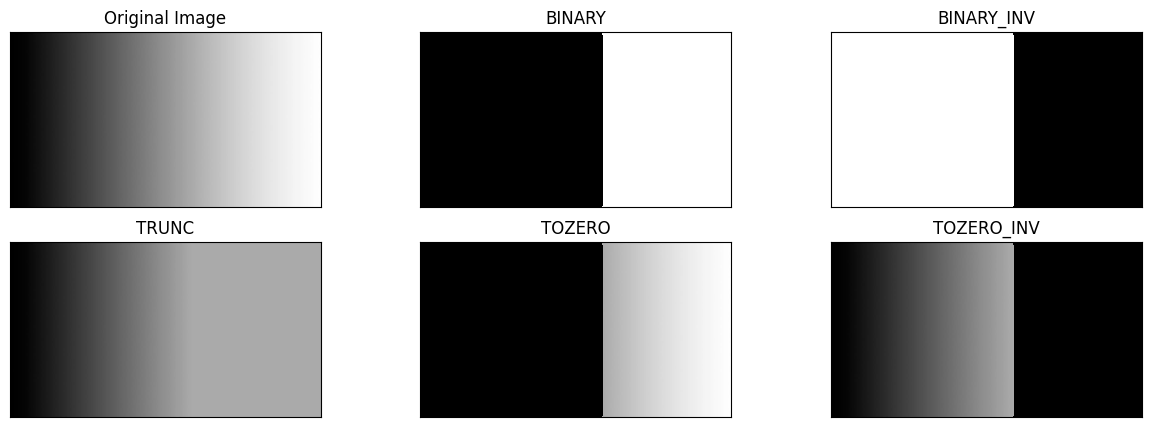

In [15]:
filename = ('/content/drive/MyDrive/Colab Notebooks/Pcvk/image_thres/gradient.jpg')
img = cv2.imread(filename)
thresh1 = cv2.imread(filename)
thresh2 = cv2.imread(filename)
thresh3 = cv2.imread(filename)
thresh4 = cv2.imread(filename)
thresh5 = cv2.imread(filename)
thresh = 170        #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
thresh1[img>thresh] = 255

#tanpa library
thresh1[img<=thresh] = 0

#2. thresh2 adalah binary threshold inverse
thresh2 = 255 - thresh1

#3. Threshold Truncate
thresh3[img>thresh] = thresh #tanpa library

#4. Threshold Tozero
thresh4[img<=thresh] = 0 #tanpa library

#5. Threshold Tozero Inverse
thresh5[img>thresh] = 0 #tanpa library

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

### Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

167


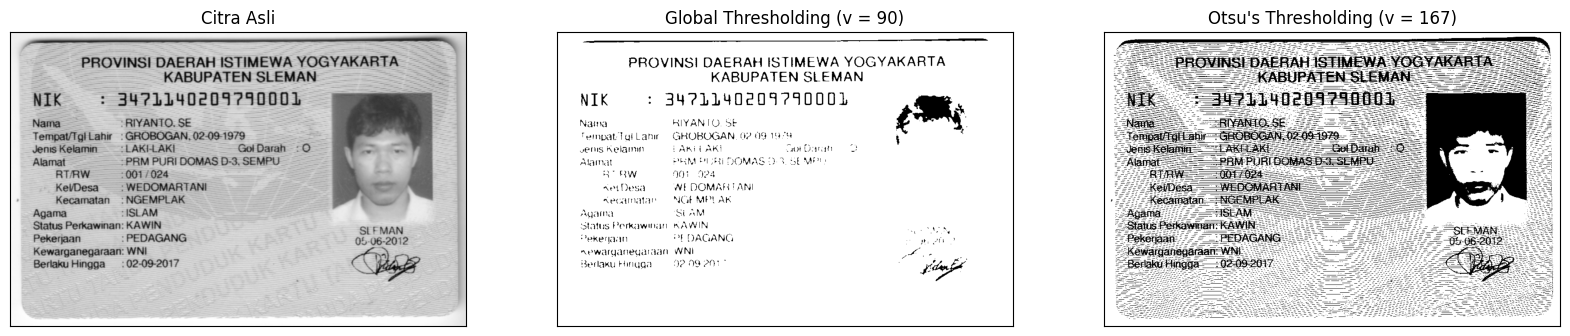

In [16]:
filename = ('/content/drive/MyDrive/Colab Notebooks/week7/KTP_More/ktp.png')
img = cv2.imread(filename)
img = cv2.imread(filename,0)
blur = cv2.GaussianBlur(img,(5,5),0)
def otsu(gray):
  pixel_number = gray.shape[0] * gray.shape[1]
  mean_weight = 1.0/pixel_number
  his, bins = np.histogram(gray, np.arange(0,257))
  final_thresh = -1
  final_value = -1
  intensity_arr = np.arange(256)
  for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
    pcb = np.sum(his[:t])
    pcf = np.sum(his[t:])
    Wb = pcb * mean_weight
    Wf = pcf * mean_weight
    mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
    muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)
    #print mub, muf
    value = Wb * Wf * (mub - muf) ** 2
    if value > final_value:
      final_thresh = t
      final_value = value
  final_img = gray.copy()
  print(final_thresh)
  final_img[gray > final_thresh] = 255
  final_img[gray < final_thresh] = 0
  return final_img, final_thresh
otsu_biner, otsu_thresh = otsu(img)
x = ("Otsu's Thresholding (v = ")+str(otsu_thresh)+")"
ret,th1 = cv2.threshold(blur,90,255,cv2.THRESH_BINARY)
#ret,th2 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, otsu_biner]
plt.figure(figsize = (20,15))
for i in range(len(citra3)):
  plt.subplot(1,3,i+1),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

### Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.

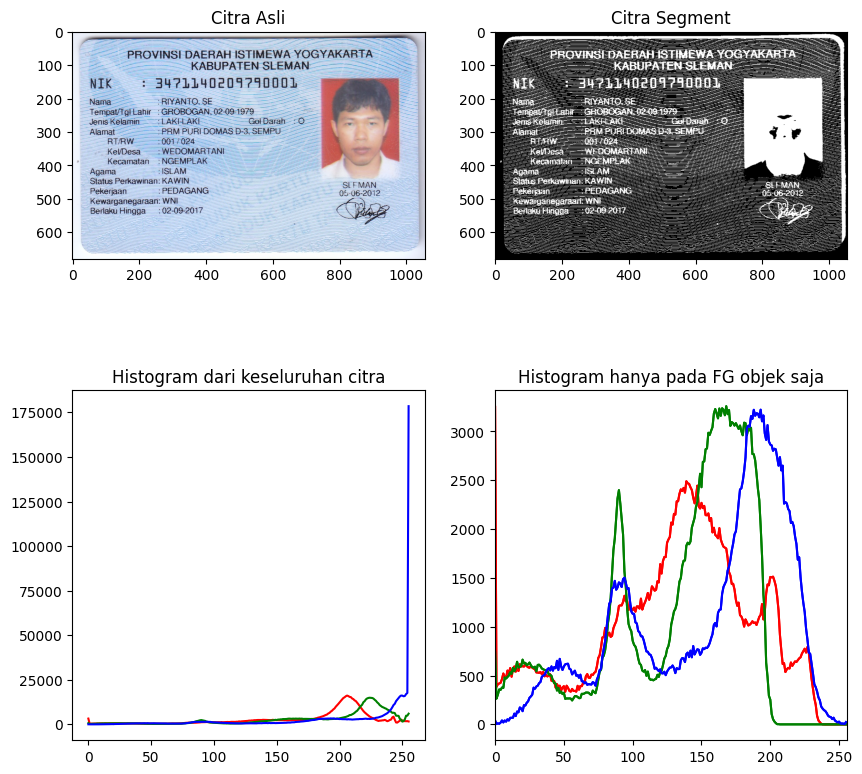

In [17]:
ktp = ('/content/drive/MyDrive/Colab Notebooks/week7/KTP_More/ktp.png')
img_l = cv2.imread(ktp)
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

### Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

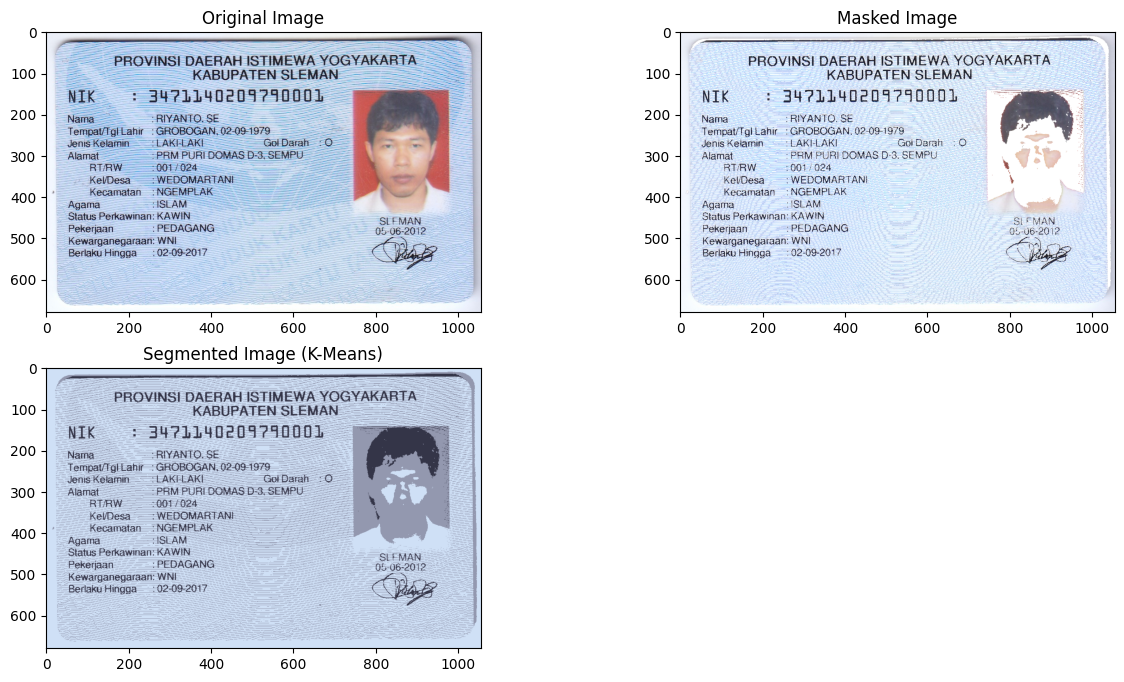

In [18]:
ktp = ('/content/drive/MyDrive/Colab Notebooks/week7/KTP_More/ktp.png')
img = cv2.imread(ktp)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3# Number of clusters

# Apply K-Means clustering
# K-Means dari library openCV
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into white
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 2
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(img.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(img.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Original Image')

plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title('Segmented Image (K-Means)')

plt.show()

### implementasikan thresholding dengan beberapa metode yang telah Anda ketahui untuk melakukan segmentasi pada dataset KTP pertemuan 7.

In [19]:
# Import Library

import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab
import os
import random
from sklearn.cluster import KMeans
import math

In [27]:
ktp_path = ('/content/drive/MyDrive/Colab Notebooks/week7/KTP_More/KTP7.jpeg')

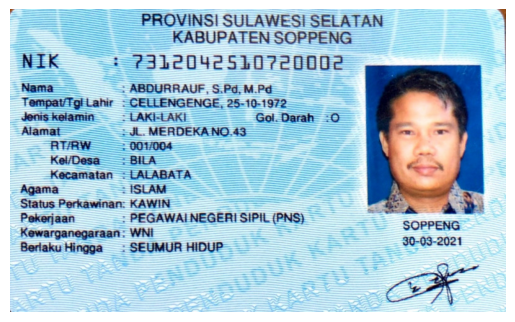

In [28]:
# Read the image using OpenCV
ktp = cv2.imread(ktp_path)

# Display the image using Matplotlib
plt.figure()
plt.axis('off')
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))
plt.show()

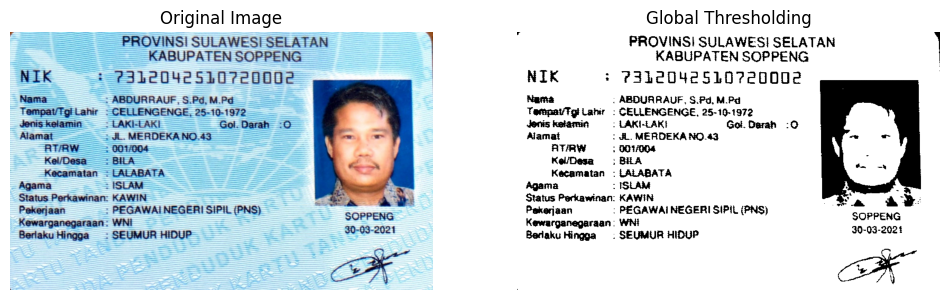

In [37]:
ktp_path = ('/content/drive/MyDrive/Colab Notebooks/week7/KTP_More/KTP7.jpeg')

# Read the image using OpenCV
ktp = cv2.imread(ktp_path)
gray = cv2.cvtColor(ktp, cv2.COLOR_BGR2GRAY)  # Convert the image to grayscale

# Perform Global Thresholding
ret, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Display the original and thresholded images using Matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Original Image')
plt.axis('off')
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))

plt.subplot(122)
plt.title('Global Thresholding')
plt.axis('off')
plt.imshow(thresholded, cmap='gray')

plt.show()


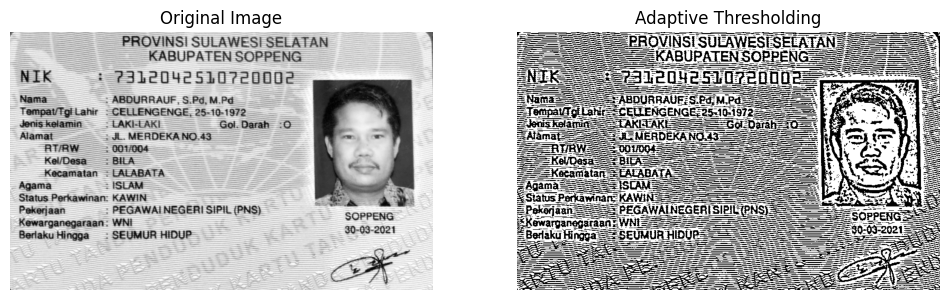

In [38]:
# Read the image using OpenCV
ktp = cv2.imread(ktp_path, 0)  # Read the image in grayscale

# Perform Adaptive Thresholding
adaptive_threshold = cv2.adaptiveThreshold(ktp, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Display the original and thresholded images using Matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Original Image')
plt.axis('off')
plt.imshow(ktp, cmap='gray')

plt.subplot(122)
plt.title('Adaptive Thresholding')
plt.axis('off')
plt.imshow(adaptive_threshold, cmap='gray')

plt.show()

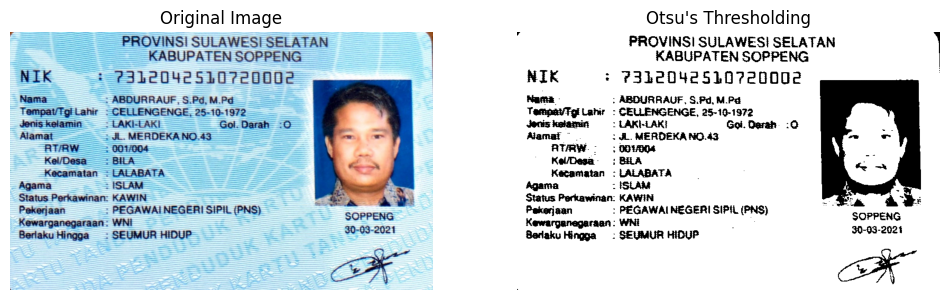

In [39]:
ktp_path = ('/content/drive/MyDrive/Colab Notebooks/week7/KTP_More/KTP7.jpeg')

# Read the image using OpenCV
ktp = cv2.imread(ktp_path)
gray = cv2.cvtColor(ktp, cv2.COLOR_BGR2GRAY)  # Convert the image to grayscale

# Perform Otsu's Thresholding
_, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original and thresholded images using Matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Original Image')
plt.axis('off')
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))

plt.subplot(122)
plt.title("Otsu's Thresholding")
plt.axis('off')
plt.imshow(thresholded, cmap='gray')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


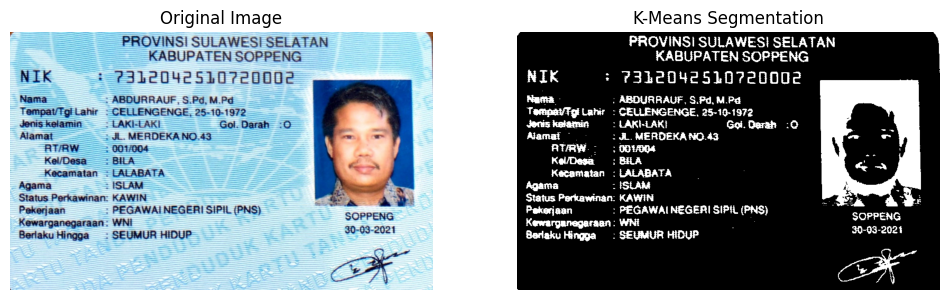

In [49]:
ktp_path = ('/content/drive/MyDrive/Colab Notebooks/week7/KTP_More/KTP7.jpeg')

# Read the image using OpenCV
img = cv2.imread(ktp_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert the image to grayscale

# Perform Otsu's Thresholding
_, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Convert the image to a format that can be used by K-Means
img_flat = img.reshape((-1, 3))
img_flat = np.float32(img_flat)

# K-Means
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(img_flat)
segmented = labels.reshape(img.shape[0], img.shape[1])

# Display the original and segmented images using Matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Original Image')
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(122)
plt.title('K-Means Segmentation')
plt.axis('off')
plt.imshow(segmented, cmap='gray')

plt.show()